# Nastri Lorenzo





# Examen 2: POO
fecha: 30/11/2023
* El examen se aprueba con 60 puntos. Tienen hasta 11.15 am. 
* Entregar un solo archivo Jupyter con nombre y apellido.
* Todas las consignas deben tener justificación con texto y explicación conceptual. No del código sino de la razón de la operación.

Datasets:
* conversion_para_entrenar.csv
* ingreso_para_entrenar.csv
* conversion_para_predecir.csv
* costo_publicidad.csv
* conversion_real.csv

## Supermercado La gondola. Año 2092
 
El supermercado la gondola es un líder en el sector minorista, atendiendo a clientes en el planeta tierra y con una sucursal en marte. Cuenta con una diversa gama de productos que incluye alimentación, tecnología, moda, entre otros. El supermercado posee toda su operacion de manera Holografica, por lo tanto es crucial predecir la conversión de los clientes dado su comportamiento. La idea será efectuar una campaña de marketing en aquello clientes que un algoritmo clasifique como compradores. Ahora bien dado que el costo de las publicidades holograficas es elevado, la empresa quiere solo publicitar en los clientes de alto valor. Para esto es importante generar una regresion que permita predecir el ingreso del cliente. 
 
Tu tarea como cientifico de datos es crear los dos algoritmos y luego calcular el rango de ganancia esperada de la propuesta, justificando tus servicios en el ROI del supermercado. 

	


# Clasificacion  (30 pts)
**total de la consigna (30 pts) Separado en preprocesamiento 20pts y modelo 10pts**

1. Decidir que hacer con el valor de  la ubicación "Marte". Si la decisión es no quedarse con Marte filtrar el dataset y continuar sin esa categoria, si la decision es quedarse con Marte, avanzar. La única razón que aceptará el directorio es demostrarlo vía datos de comportamiento del cliente respecto a **variables de navegación**. 
* Justificar graficamente 
* Realizar un t-test
*Hint: Hay algo parecido a las semanas de embarazos del examen anterior* (10 pts)  

2. Hay dos columnas con valores atipicos.  (10 pts)
* Graficar y encontrar valores outliers
* ¿Cuantos valores outliers hay por cada columna? Para responder esto tendra que crear una columna por variable que determine si esa row es outlier o no. A esto se le llama columna flag. Utilice la funcion find_and_filter_outliers y modifiquela para obtener lo requerido. *Hint: f-string*
* Solo una de las dos columnas debe filtrarse y la otra no. Tenga en cuenta que vamos a usar un modelo de decisión tree que es robusto a outliers. Justificar cual y aplique la función original find_and_filter_outliers y filtrar los puntos atipicos en el nuevo dataset

```python

def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   

    # Retornar un dataset filtrado
    return dataframe[dataframe['is_outlier'] == 'No']
```
3. Seleccionar solo las variables pertinentes para un modelo de clasificación de conversión. Ejemplo: No necesitamos el id de la persona. Crear una hipotesis en palabras. Cree las variables dummies si cree correspondiente (5 pts)
```python
df_con_dummies = pd.get_dummies(df, columns=["cols_for_one_hot"])
```

### Modelo (10pts)
4. Separar train y test. Fitear un arbol de profundidad 3. 

```python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
```
5. Crear y_pred
6. Generar  la matriz de confusion y las metricas, precision, recall y acuracy. Respecto a y_test
```python
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
```
5. Explicar la metrica precision_score en palabras. Que significa en este contexto?

6. Visualizar el arbol. ¿Que regla o reglas harías a la hora de hacer una publicidad? (hint te lo dice el grafico) 
Codigo que funciona bastante bien en todas las computadoras. 
```python
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Clase1', 'Clase2'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 
```

###  Regresión (20 pts)

Instrucciones y Puntaje:
1. Valores faltantes. (5 pts)

Este dataset **no tiene valores outliers** para que sea mas fácil la resolución del examen. 
Lo que si **tiene son valores nulos** en solo dos columnas. 

* Elegir cual columna con nulos se reemplaza con 0 y cual columna con la media por la media. Justifique.

2. Selección de Variables pertinentes  (5 pts)
Descarte la variable (o variables) que no considere importante para la predicciòn del ingreso del cliente. Justifique. 

3.Entrenamiento y Validación del Modelo de Regresión (10 pts)
* Divida el conjunto de datos en entrenamiento y test. 
* Entrene un algoritmo de regresion que prediga ingreso.


```python
import statsmodels.api as sm
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
```
* Evalue el modelo utilizando la metrica MAPE




```python
import numpy as np
predicciones = modelo.predict(X)
# Calcular MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")
```
* Interprete los coeficiente que significan (Explicar en palabras)
* Intereprete el error MAPE que significa? (Explicar en palabras)



##  Integración de Modelos y ROI en Publicidad 


## Explicación:

### Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

### Cálculo del Costo de Publicidad total
El costo de publicidad total se pude estimar dado nuestro modelo de clasificación. Aunque sea en otro set de entrenamiento tenemos una estimación que podemos inferir para otra muestra. La formula es

\begin{equation*}
CostoPublicidad_{Total} = Suma de Costo_{publicidad}
\end{equation*}


\begin{equation*}
CostoPublicidad_{desperdiciado} = FP_{i} \times Costo_{publicidad}
\end{equation*}

Donde $FP_{i}$ son los clientes especificios que fueron falsos positivos y $Costo_{publicidad}$ es el costo de publicidad por cliente dado en el dataset costo.csv


#### Cálculo del ROI


\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}



## Consignas ganancia del modelo (50pts):
a. Implemente el modelo entrenado anteriormente y prediga los modelos en dataset para predecir.
b. Calcule la estimación del valor esperado de esos clientes. Prob_compra * Ingreso estimado.Cual es el valor esperado del modelo?  
c. Dado los resultados en el punto (1) del examen. Estime en 1000 clientes nuevos cuantos esperaría que fueran FP? (redonde para arriba en caso de necesitarlo)  Calcule entonces el Costo de publicidad desperdiciada dada esa estimación.
d. Luego de estas estimaciones paso 1 mes y ahora sabemos que clientes convirtieron dataset **conversion_real.csv**. Calcule entonces el ROI cliente a cliente. 
e. Cual es el costo de publicidad despediciado ahora que sabemos que cliente convirtio?
f. que cliente tiene mayor ROI?
```python
.nlargest(1, 'roi')
```
g. ¿Cual es la ganancia real del modelo?




____

In [125]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")




In [126]:
df_conversion_para_entrenar = pd.read_csv("conversion_para_entrenar.csv")
df_conversion_para_entrenar.head()

,,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,0,1,9,91.231418,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,1,2,5,740.421698,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,2,3,6,15.947268,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,3,4,5,950.486443,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,4,5,5,63.656943,26,1982-11-23 12:27:39.148023,Marte,ordenador,No


In [127]:
df_conversion_para_entrenar.columns

Index(['     ', 'id del cliente ', 'páginas visitadas ',
       'duración de la sesión ', 'número de visitas ',
       'fecha de nacimiento        ', 'ubicación ', 'dispositivo ',
       'convertido'],
      dtype='object')

### Remuevo los espacios en blanco de cada columna para poder trabajar mejor.

In [128]:
from funciones.funciones_parcial2 import whitespace_remover_and_columns
df_conversion_para_entrenar = whitespace_remover_and_columns(df_conversion_para_entrenar)

In [129]:
df_conversion_para_entrenar.columns

Index(['', 'id del cliente', 'páginas visitadas', 'duración de la sesión',
       'número de visitas', 'fecha de nacimiento', 'ubicación', 'dispositivo',
       'convertido'],
      dtype='object')

### Procedo a sacar la columna '' ya que no me sirve de nada.

In [130]:
df_conversion_para_entrenar.drop(columns = [""], inplace = True)

### Hago validación de la data para ver si hay valores nulos, etc.

In [131]:
from funciones.funciones_parcial2 import validate_columns
validate_columns(df_conversion_para_entrenar)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
id del cliente,NaN,3000.0,0,0.0,"[1355, 1294, 934, 1912, 1879]"
páginas visitadas,NaN,3000.0,0,0.0,"[3, 6, 4, 4, 4]"
duración de la sesión,NaN,3000.0,0,0.0,"[307.6049349371186, 317.58016741462234, 286.15..."
número de visitas,NaN,3000.0,0,0.0,"[6, 18, 17, 1, 12]"
fecha de nacimiento,90,3000,0,0.0,"[1990-11-21 12:27:39.148023, 1966-11-27 12:27:..."
ubicación,4,3000,0,0.0,"[Ciudad A, Ciudad B, Ciudad B, Ciudad B, Ciuda..."
dispositivo,3,3000,0,0.0,"[ordenador, tablet, tablet, ordenador, tablet]"
convertido,2,3000,0,0.0,"[No, Sí, No, No, Sí]"


___

# Clasificación

1. Decidir que hacer con el valor de  la ubicación "Marte". Si la decisión es no quedarse con Marte filtrar el dataset y continuar sin esa categoria, si la decision es quedarse con Marte, avanzar. La única razón que aceptará el directorio es demostrarlo vía datos de comportamiento del cliente respecto a **variables de navegación**. 
* Justificar graficamente 
* Realizar un t-test
*Hint: Hay algo parecido a las semanas de embarazos del examen anterior* (10 pts)  

In [132]:
df_conversion_para_entrenar.head()

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,1,9,91.231418,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,2,5,740.421698,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,3,6,15.947268,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,4,5,950.486443,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,5,5,63.656943,26,1982-11-23 12:27:39.148023,Marte,ordenador,No


In [133]:
df_conversion_para_entrenar["ubicación"].value_counts()

ubicación
Ciudad B    1396
Ciudad A    1394
Marte        150
Ciudad C      60
Name: count, dtype: int64

### Hago boxplot para comparar las variables de navegación entre Marte y Tierra.

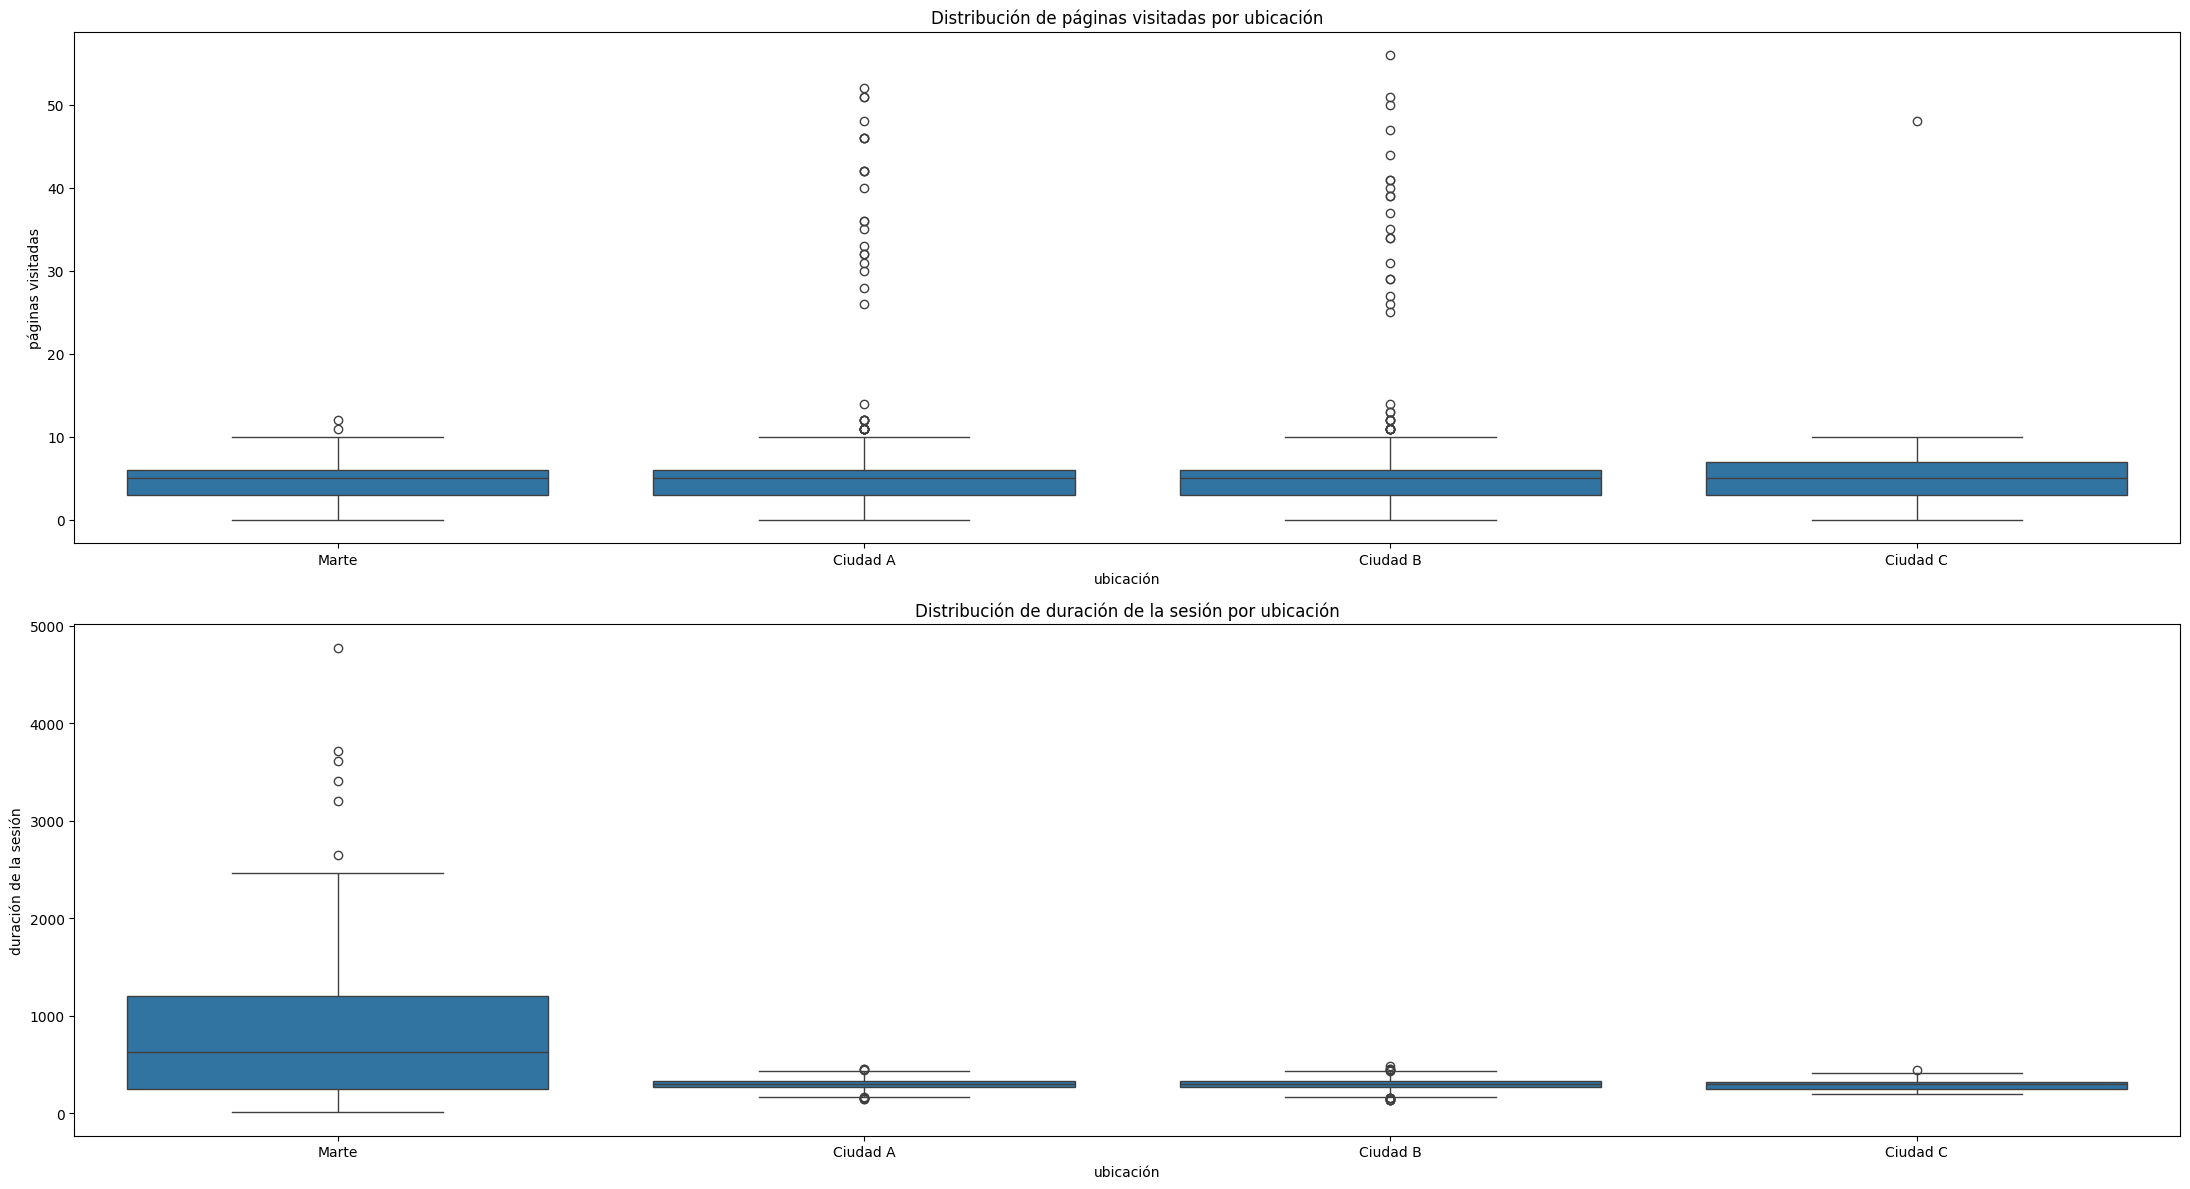

In [134]:
from funciones.funciones_parcial2 import distribucion_entre_variables

otras_variables = ['páginas visitadas', "duración de la sesión"]

distribucion_entre_variables(df_conversion_para_entrenar, 'ubicación', otras_variables)

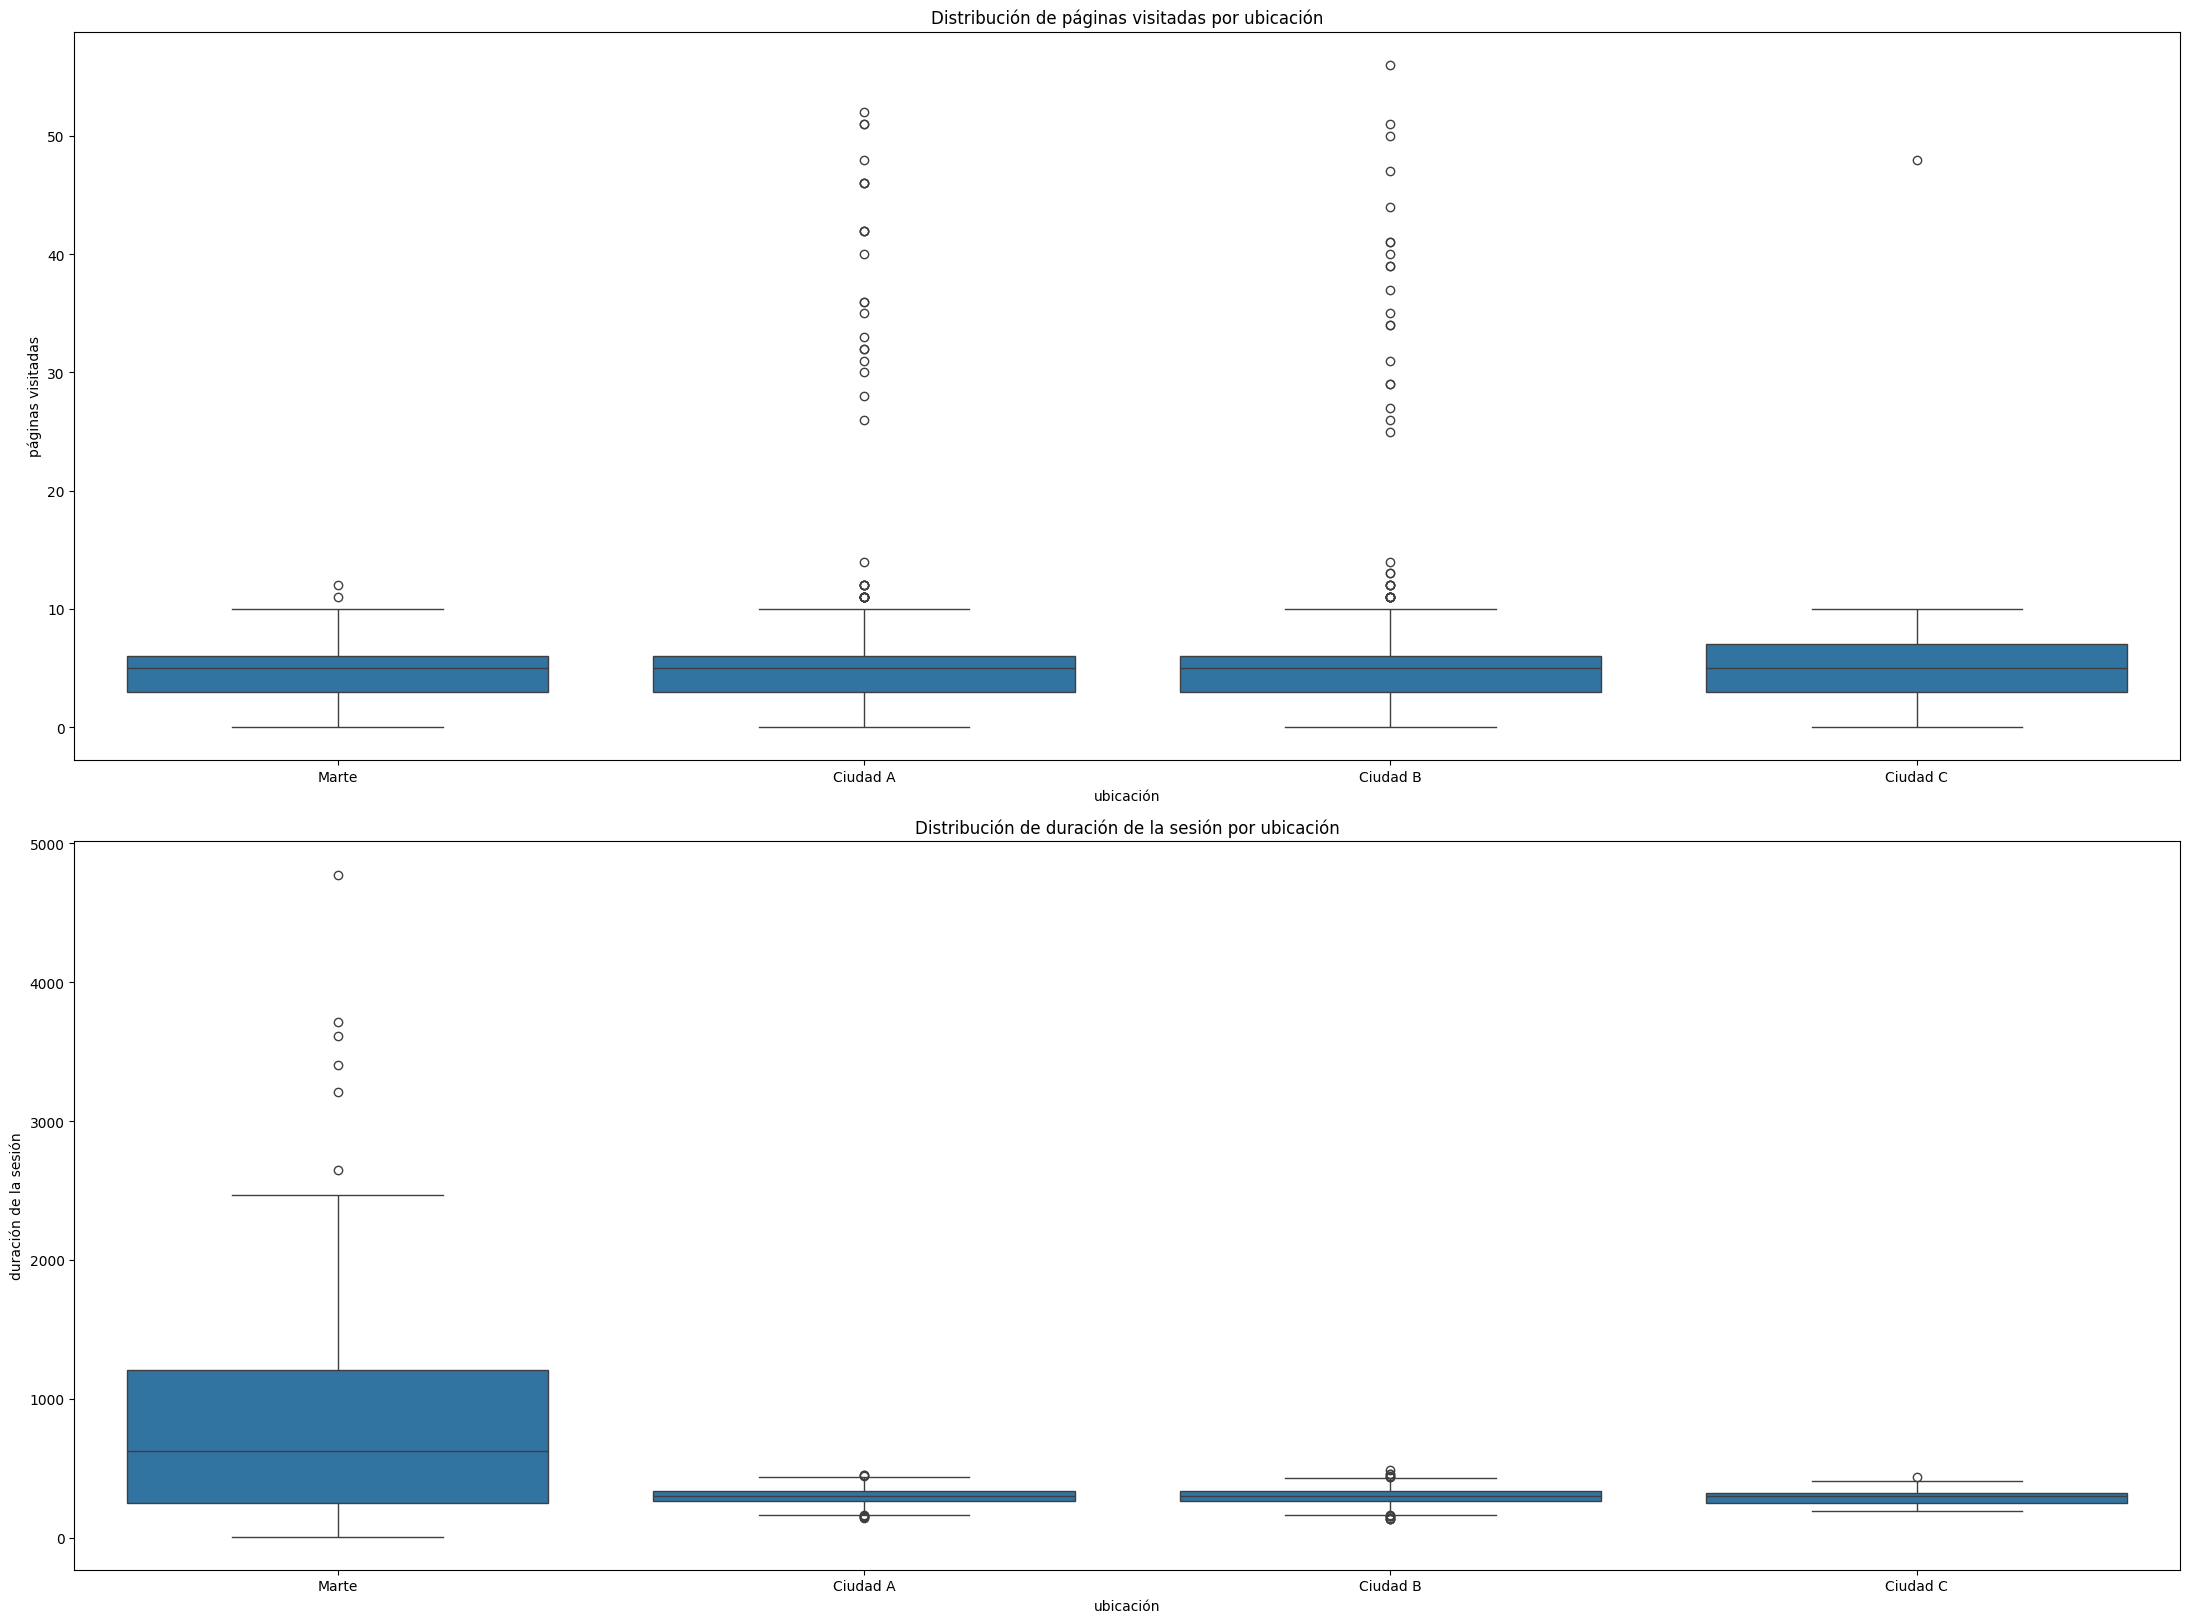

In [135]:
otras_variables = ['páginas visitadas', "duración de la sesión"]

plt.figure(figsize=(22, 24))
for i, variable in enumerate(otras_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='ubicación', y=variable, data=df_conversion_para_entrenar)
    plt.title(f'Distribución de {variable} por ubicación')

plt.tight_layout()
plt.show()

In [136]:
"""
sns.boxplot(x=df_conversion_para_entrenar["ubicación"], y=df_conversion_para_entrenar["páginas visitadas"])
sns.set_style("darkgrid")
"""

'\nsns.boxplot(x=df_conversion_para_entrenar["ubicación"], y=df_conversion_para_entrenar["páginas visitadas"])\nsns.set_style("darkgrid")\n'

In [137]:
"""
sns.boxplot(x=df_conversion_para_entrenar["ubicación"], y=df_conversion_para_entrenar["duración de la sesión"])
sns.set_style("darkgrid")
"""

'\nsns.boxplot(x=df_conversion_para_entrenar["ubicación"], y=df_conversion_para_entrenar["duración de la sesión"])\nsns.set_style("darkgrid")\n'

In [138]:
from scipy.stats import ttest_ind

group1 = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] == "Marte"]["duración de la sesión"]
group2 = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] != "Marte"]["duración de la sesión"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa entre Marte y Tierra en la variable duración de la sesión.")
else:
    print("No rechazar la hipótesis nula. No una diferencia significativa entre Marte y Tierra en la variable duración de la sesión.")

Rechazar la hipótesis nula. Hay una diferencia significativa entre Marte y Tierra en la variable duración de la sesión.


### Procedo a eliminar los valores de Marte, ya que no me sirve tener en cuenta sus datos para predecir el comportamiento de los clientes en la Tierra. Tampoco es mucha la cantidad de datos que tengo de Marte, por lo que no me afecta mucho el eliminarlos.

In [139]:
df_conversion_para_entrenar = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] != "Marte"]

### Paso la variable de convertido a dummies para poder trabajar mejor con ella. Veo que onda tasa de conversion por ciudad

In [140]:
df_conversion_para_entrenar['convertido'] = df_conversion_para_entrenar['convertido'].map({'Sí': 1, 'No': 0})


In [141]:
df_conversion_para_entrenar

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
150,151,8,414.129933,11,2005-11-17 12:27:39.148023,Ciudad A,móvil,0
151,152,3,247.930919,6,1986-11-22 12:27:39.148023,Ciudad B,ordenador,0
152,153,4,261.724178,19,1966-11-27 12:27:39.148023,Ciudad B,ordenador,0
153,154,2,294.076794,31,1975-11-25 12:27:39.148023,Ciudad B,tablet,0
154,155,5,363.287411,23,1998-11-19 12:27:39.148023,Ciudad A,móvil,1
...,...,...,...,...,...,...,...,...
2995,2996,6,213.400237,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,0
2996,2997,3,359.351304,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,0
2997,2998,9,352.961711,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,0
2998,2999,7,230.507817,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,0


In [142]:
df_conversion_para_entrenar.groupby("ubicación").agg({"convertido": "mean"}).reset_index()

,ubicación,convertido
0,Ciudad A,0.483501
1,Ciudad B,0.483524
2,Ciudad C,0.516667


___

2. Hay dos columnas con valores atipicos.  (10 pts)
* Graficar y encontrar valores outliers
* ¿Cuantos valores outliers hay por cada columna? Para responder esto tendra que crear una columna por variable que determine si esa row es outlier o no. A esto se le llama columna flag. Utilice la funcion find_and_filter_outliers y modifiquela para obtener lo requerido. *Hint: f-string*
* Solo una de las dos columnas debe filtrarse y la otra no. Tenga en cuenta que vamos a usar un modelo de decisión tree que es robusto a outliers. Justificar cual y aplique la función original find_and_filter_outliers y filtrar los puntos atipicos en el nuevo dataset

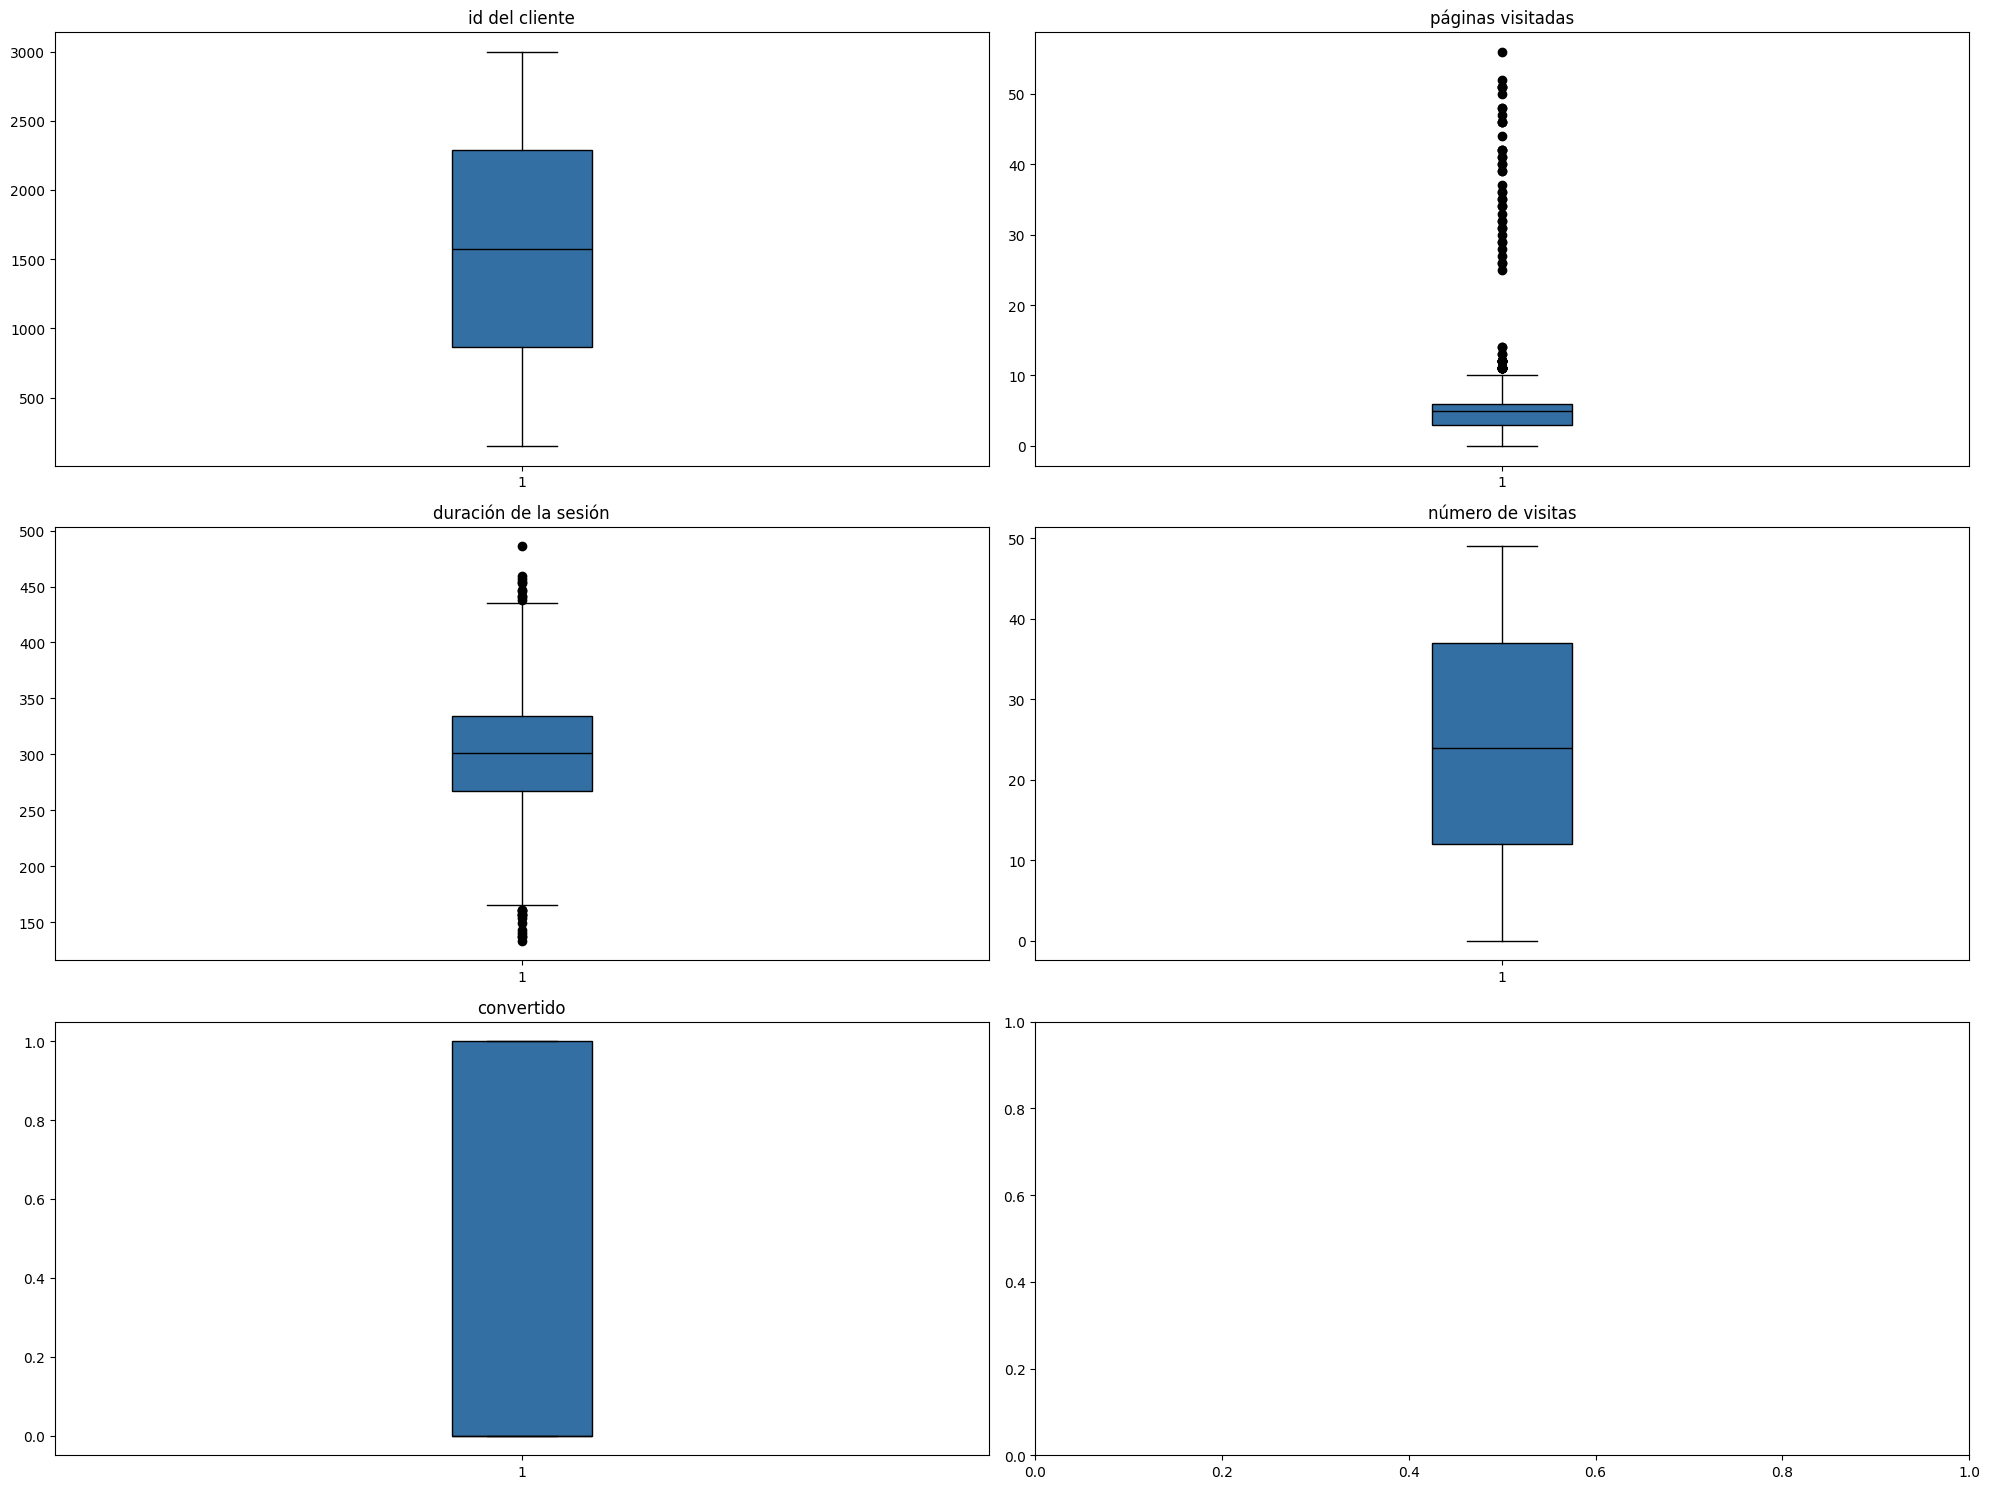

In [143]:
from funciones.funciones_parcial2 import plot_outliers
plot_outliers(df_conversion_para_entrenar)

In [144]:
def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   

    # Retornar un dataset filtrado
    return dataframe[dataframe['is_outlier'] == 'No']

### Solamente saco una columna de las dos que tienen outliers, ya que el modelo de árbol de decisión es robusto a outliers. La que mas afectaria al modelo sería páginas visitadas ya que es la que mayor cantidad de valores outliers tiene.

In [145]:
df_conversion_para_entrenar.shape

(2850, 8)

In [146]:
df_conversion_para_entrenar = find_and_filter_outliers(df_conversion_para_entrenar, "páginas visitadas")

In [147]:
df_conversion_para_entrenar["is_outlier"].value_counts()

is_outlier
No    2776
Name: count, dtype: int64

### El dataframe al parecer tenía 74 valores outliers dado que el dataset original tenía 2850 filas y ahora pasó a tener 2776 filas.

### Decido sacar paginas visitadas ya que lo más comun es visitar entre 1 y 10 páginas. Es muy raro que se visiten por encima de 20 o 30 paginas. Además siento que es un poco más común que haya mas duración de la sesión que páginas visitadas.

___

3. Seleccionar solo las variables pertinentes para un modelo de clasificación de conversión. Ejemplo: No necesitamos el id de la persona. Crear una hipotesis en palabras. Cree las variables dummies si cree correspondiente (5 pts)

### Hipótesis: La variable de duración de la sesión es la que más afecta a la conversión de los clientes. A mayor duración de la sesión, mayor probabilidad de que el cliente compre.

In [148]:
df_con_dummies = pd.get_dummies(df_conversion_para_entrenar, columns=["ubicación", "dispositivo"])
df_con_dummies = df_con_dummies.replace({True: 1, False: 0})

In [149]:
df_con_dummies['duración de la sesión'] = df_conversion_para_entrenar['duración de la sesión'].astype(int)

In [150]:
df_con_dummies["hoy"]= "2023-11-30"
df_con_dummies['hoy'] = pd.to_datetime(df_con_dummies['hoy'])
df_con_dummies['fecha de nacimiento'] = pd.to_datetime(df_con_dummies['fecha de nacimiento'])
df_con_dummies['edad'] = (df_con_dummies['hoy'] - df_con_dummies['fecha de nacimiento']).dt.days//365

In [151]:
df_con_dummies

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,convertido,is_outlier,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad
150,151,8,414,11,2005-11-17 12:27:39.148023,0,No,1,0,0,1,0,0,2023-11-30,18
151,152,3,247,6,1986-11-22 12:27:39.148023,0,No,0,1,0,0,1,0,2023-11-30,37
152,153,4,261,19,1966-11-27 12:27:39.148023,0,No,0,1,0,0,1,0,2023-11-30,57
153,154,2,294,31,1975-11-25 12:27:39.148023,0,No,0,1,0,0,0,1,2023-11-30,48
154,155,5,363,23,1998-11-19 12:27:39.148023,1,No,1,0,0,1,0,0,2023-11-30,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,6,213,6,1962-11-28 12:27:39.148023,0,No,0,1,0,0,1,0,2023-11-30,61
2996,2997,3,359,7,1962-11-28 12:27:39.148023,0,No,0,1,0,0,1,0,2023-11-30,61
2997,2998,9,352,33,1980-11-23 12:27:39.148023,0,No,1,0,0,0,1,0,2023-11-30,43
2998,2999,7,230,13,1982-11-23 12:27:39.148023,0,No,1,0,0,0,1,0,2023-11-30,41


In [152]:
X = df_con_dummies[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C", "edad"]]
y = df_con_dummies["convertido"]

___

4. Separar train y test. Fitear un arbol de profundidad 3. 

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [154]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [155]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
score = cross_val_score(decision_tree_model, X, y, cv=5)  
print('Puntuación de validación cruzada:', score)

# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train) # Agarra todo de train y aplicale el modelo. 
print("Precisión en entrenamiento =", dt_train_accuracy) 

# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test) # Agarra todo de test y aplicale el modelo.
print("Precisión en pruebas =", dt_test_accuracy)

Puntuación de validación cruzada: [0.51258993 0.51351351 0.47567568 0.4954955  0.4990991 ]
Precisión en entrenamiento = 0.5247747747747747
Precisión en pruebas = 0.5089928057553957


### La precisión en entrenamiento es un 2% mas alta que en el de pruebas.

___

5. Crear y_pred

In [156]:
# decision_tree_model = decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)


___

6. Generar  la matriz de confusion y las metricas, precision, recall y acuracy. Respecto a y_test

In [157]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

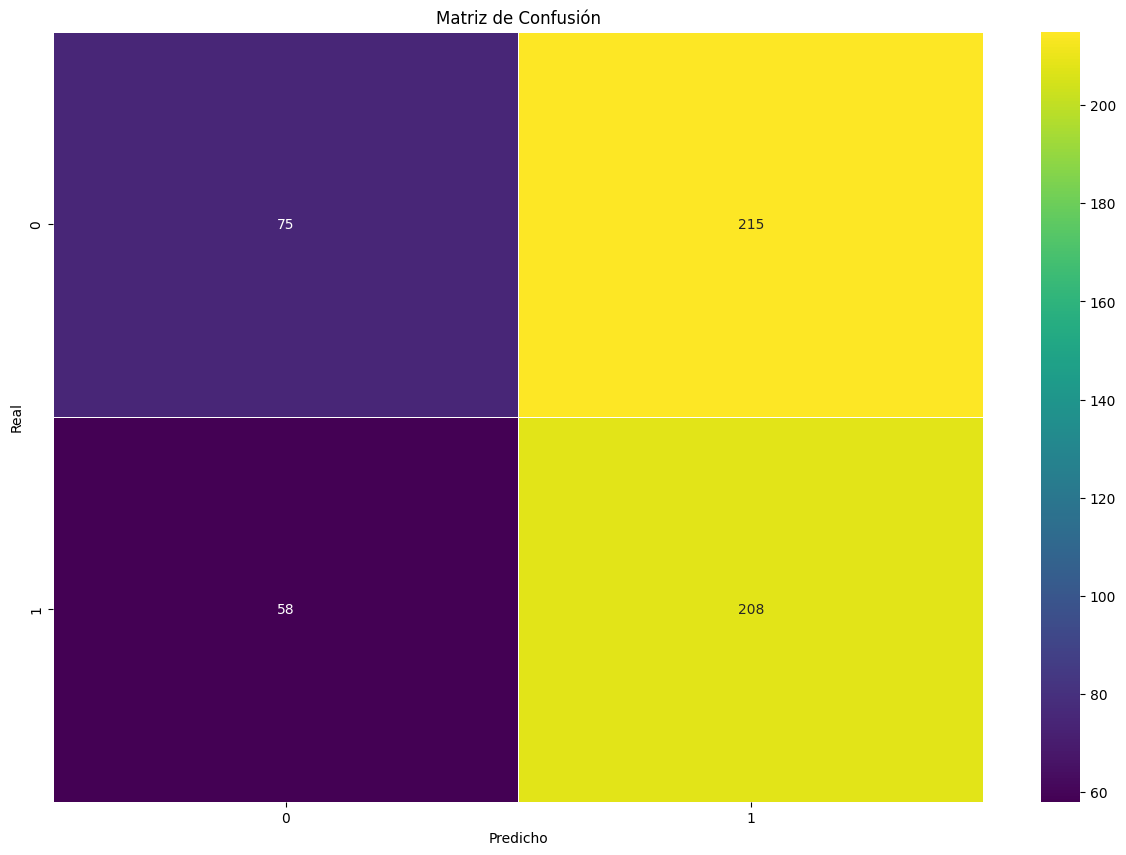

In [158]:
# y_pred = decision_tree_model.predict(X_test)
y_true = y_test
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [159]:
y_test.shape

(556,)

#### La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Esto mide la precisión del clasificador a la hora de predecir casos positivos.

#### Aplicado a este contexto de clasificación, la precisión es la relación entre los clientes que realmente compraron y los clientes que el modelo predijo que compraron.

In [160]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

print("Precisión:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Exactitud:", accuracy_score(y_true, y_pred))

Precisión: 0.491725768321513
Recall: 0.7819548872180451
Exactitud: 0.5089928057553957


___

6. Visualizar el arbol. ¿Que regla o reglas harías a la hora de hacer una publicidad? (hint te lo dice el grafico) 
Codigo que funciona bastante bien en todas las computadoras. 

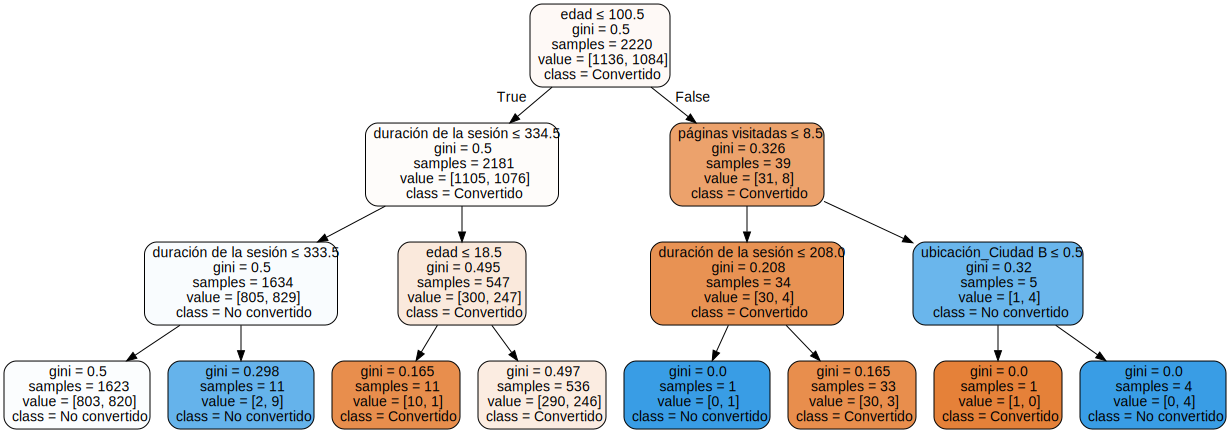

In [161]:
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Convertido', 'No convertido'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 

### La duración de la sesión y el número de visitas son los criterios principales para determinar si una campaña publicitaria será exitosa o no. Si la duración de la sesión es menor o igual a 333.5 y el número de visitas es menor o igual a 30.5, la campaña es menos probable de ser exitosa. Por otro lado, si la duración de la sesión es mayor que 334.5 y el número de visitas es mayor que 40.0, la campaña es más probable de ser exitosa.


____

#  Regresión

In [162]:
df_ingreso_para_entrenar = pd.read_csv("ingreso_para_entrenar.csv")
df_ingreso_para_entrenar 

,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
0,0,437.086107,318.442747,246.279263,7.0,6,56.235016,319.511016
1,1,955.642876,835.756374,235.234099,3.0,8,52.603747,430.490885
2,2,758.794548,1315.771462,729.690935,5.0,1,82.980012,643.483521
3,3,638.792636,1111.726085,237.159650,3.0,3,50.024691,322.259467
4,4,240.416776,1219.513664,253.962295,NaN,3,38.493164,366.779166
...,...,...,...,...,...,...,...,...
995,995,182.423866,1002.584977,698.971819,3.0,0,89.929168,532.971139
996,996,925.582218,1437.091201,167.954906,4.0,6,64.596994,589.117449
997,997,223.136768,149.989124,282.340894,6.0,4,43.710203,178.161379
998,998,955.213618,132.729346,267.534149,4.0,3,38.721009,420.855709


In [163]:
df_ingreso_para_entrenar.drop(columns = ["Unnamed: 0"], inplace = True)

In [164]:
df_ingreso_para_entrenar.isna().sum()

gasto_alimentacion            0
gasto_tecnologia              0
gasto_moda                   50
frecuencia_compra            80
promociones_utilizadas        0
distancia_a_hipermercados     0
ingreso_cliente               0
dtype: int64

* Elegir cual columna con nulos se reemplaza con 0 y cual columna con la media por la media. Justifique.

In [165]:
df_ingreso_para_entrenar["gasto_moda"].value_counts()

gasto_moda
246.279263    1
346.348181    1
543.015112    1
404.211353    1
710.117553    1
             ..
337.879162    1
392.177382    1
326.789766    1
140.768750    1
703.560526    1
Name: count, Length: 950, dtype: int64

In [166]:
df_ingreso_para_entrenar["frecuencia_compra"].value_counts().sort_values(ascending=True)

frecuencia_compra
0.0       5
11.0      6
10.0     11
1.0      26
9.0      29
8.0      51
2.0      68
7.0      91
3.0     134
6.0     148
4.0     168
5.0     183
Name: count, dtype: int64

### La columna la cual sus valores nulos van a ser reemplazados por 0 es 'gasto_moda'. En cambio, 'frecuencia_compra' va a ser reemplazada por la media porque no tiene sentido que un cliente no haya comprado nunca. Es decir, tener gastos, pero no haber comprado nunca??? No existe.

In [167]:
df_ingreso_para_entrenar["gasto_moda"].fillna(0, inplace=True)

In [168]:
df_ingreso_para_entrenar["frecuencia_compra"].fillna(df_ingreso_para_entrenar["frecuencia_compra"].median(), inplace=True)

In [169]:
df_ingreso_para_entrenar["gasto_moda"].value_counts()

gasto_moda
0.000000      50
246.279263     1
346.348181     1
543.015112     1
404.211353     1
              ..
337.879162     1
392.177382     1
326.789766     1
140.768750     1
703.560526     1
Name: count, Length: 951, dtype: int64

In [170]:
df_ingreso_para_entrenar["frecuencia_compra"].value_counts()

frecuencia_compra
5.0     263
4.0     168
6.0     148
3.0     134
7.0      91
2.0      68
8.0      51
9.0      29
1.0      26
10.0     11
11.0      6
0.0       5
Name: count, dtype: int64

2. Selección de Variables pertinentes  (5 pts)
Descarte la variable (o variables) que no considere importante para la predicciòn del ingreso del cliente. Justifique. 

In [171]:
df_ingreso_para_entrenar

,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
0,437.086107,318.442747,246.279263,7.0,6,56.235016,319.511016
1,955.642876,835.756374,235.234099,3.0,8,52.603747,430.490885
2,758.794548,1315.771462,729.690935,5.0,1,82.980012,643.483521
3,638.792636,1111.726085,237.159650,3.0,3,50.024691,322.259467
4,240.416776,1219.513664,253.962295,5.0,3,38.493164,366.779166
...,...,...,...,...,...,...,...
995,182.423866,1002.584977,698.971819,3.0,0,89.929168,532.971139
996,925.582218,1437.091201,167.954906,4.0,6,64.596994,589.117449
997,223.136768,149.989124,282.340894,6.0,4,43.710203,178.161379
998,955.213618,132.729346,267.534149,4.0,3,38.721009,420.855709


<Axes: >

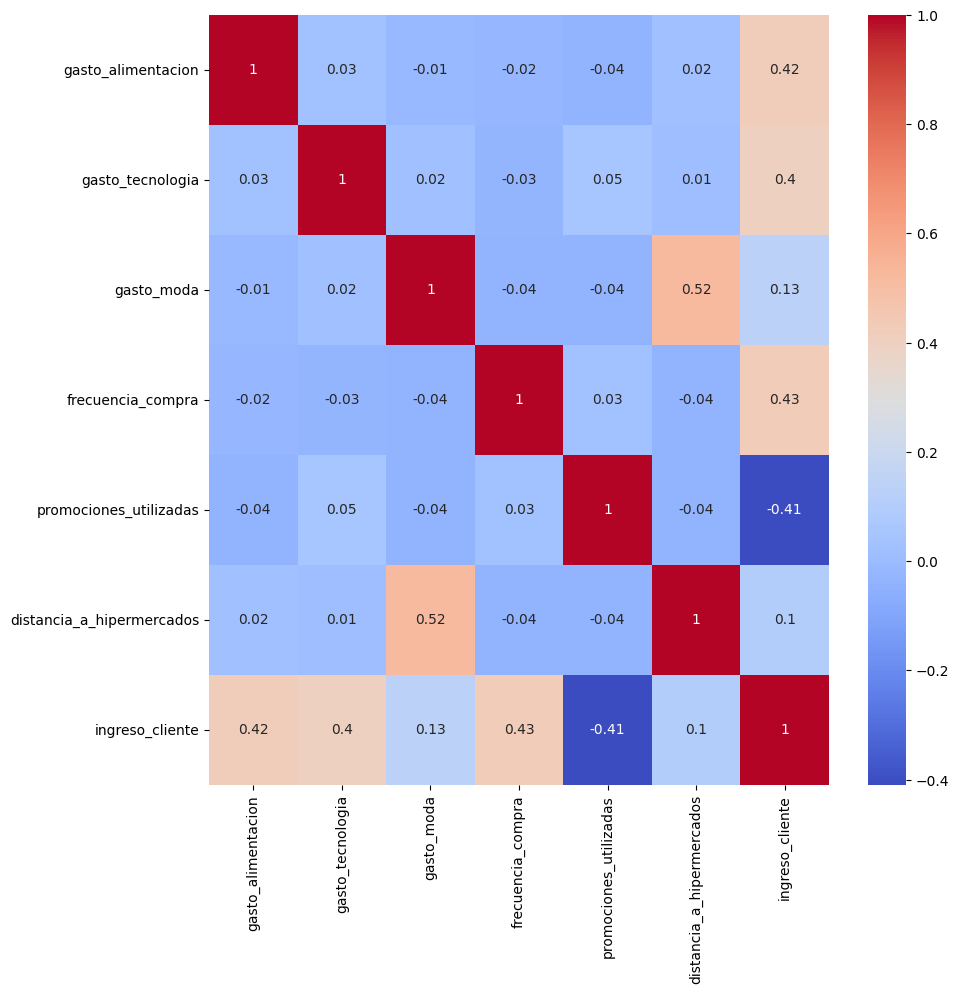

In [172]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    round(df_ingreso_para_entrenar.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

### Decido elegir las variables a continuación ya que son las que mas correlación tienen con el ingreso del cliente. Gasto_moda no tiene tanta, pero la dejo por el simple hecho de que pongo a los otros dos tipos de gastos.

In [173]:
X = df_ingreso_para_entrenar[["gasto_moda", "frecuencia_compra", "gasto_alimentacion", "gasto_tecnologia"]]
y = df_ingreso_para_entrenar['ingreso_cliente']

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [175]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [176]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
gasto_moda,0.115265
frecuencia_compra,49.220987
gasto_alimentacion,0.306040
gasto_tecnologia,0.191998


#### Los coeficientes son números que indican cómo cambia la variable dependiente (en este caso, `ingreso_cliente`) en respuesta a cambios en las variables independientes (X). 

#### El coeficiente más grande (en valor absoluto) indicaría cual es la variable más explicativa o que más impacto tiene. En este caso es `frecuencia_compra`. Que tenga un coeficiente de 49, significa que probablemente sea una persona que tiene más ingresos, ya que compra más seguido.

#### El coeficiemte de gasto_moda es de 0.1, lo cual indica que la variable dependiente (ingreso_cliente) no cambia mucho en respuesta a cambios en la variable independiente (gasto_moda). Por lo tanto, la variable que no considero importante para la predicción del ingreso del cliente es `gasto_moda`. Con gasto_tecnología ocurre algo similar, su coeficiente es de 0.2.

#### El coeficiemte de gasto_alimentacion es de 0.3 (un poquito mas representativo que los otros 2 tipos de gastos, pero no tanto como frecuencia_compra).


In [177]:
y_pred = regressor.predict(X_test)

In [178]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
993,570.939669,404.550384
859,397.849304,375.984425
298,373.738068,420.483083
553,668.922801,741.871008
672,631.876828,535.480046
971,166.302855,664.512439
27,494.235282,425.546312
231,396.957635,367.464596
306,698.974318,509.376026
706,448.957609,438.423337


In [179]:
import numpy as np
predicciones = regressor.predict(X)
# Calcular MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")

MAPE: 53.90655520229903%


### Un MAPE de 53.9% significa que el modelo predice el ingreso del cliente con un error del 53.9%. Es decir, el modelo predice el ingreso del cliente con un error del 53.9%% en promedio.

___

## Consignas ganancia del modelo (50pts):

#### a. Implemente el modelo entrenado anteriormente y prediga los modelos en dataset para predecir.

### Ingreso para predecir

In [180]:
df_ingreso_para_predecir = pd.read_csv("ingreso_para_predecir.csv")
df_ingreso_para_predecir

,Unnamed: 0.1,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ids
0,0,0,593.932154,650.245619,331.095148,4.0,1,48.833718,5000
1,1,1,743.670430,962.946539,371.514486,5.0,5,50.615011,5001
2,2,2,642.487038,1178.947183,562.292464,NaN,7,61.158411,5002
3,3,3,590.394865,1284.758802,500.710842,6.0,5,63.335536,5003
4,4,4,481.289319,1233.798435,102.862235,2.0,6,56.261429,5004
...,...,...,...,...,...,...,...,...,...
2995,2995,2995,947.518364,201.137656,435.053377,7.0,2,51.121916,7995
2996,2996,2996,591.519474,252.315674,104.166510,6.0,6,37.357515,7996
2997,2997,2997,391.252339,1059.958165,101.863543,4.0,4,42.325673,7997
2998,2998,2998,832.190516,751.360091,618.547984,6.0,0,43.444348,7998


In [181]:
df_ingreso_para_predecir["gasto_moda"].fillna(0, inplace=True)

In [182]:
df_ingreso_para_predecir["frecuencia_compra"].fillna(df_ingreso_para_predecir["frecuencia_compra"].median(), inplace=True)

In [183]:
df_ingreso_para_predecir.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"], inplace = True)

In [184]:
df_ingreso_para_predecir["ingreso_predicho"] = regressor.predict(df_ingreso_para_predecir[["gasto_moda", "frecuencia_compra", "gasto_alimentacion", "gasto_tecnologia"]])
df_ingreso_para_predecir.head()

,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ids,ingreso_predicho
0,593.932154,650.245619,331.095148,4.0,1,48.833718,5000,410.428044
1,743.670430,962.946539,371.514486,5.0,5,50.615011,5001,570.171784
2,642.487038,1178.947183,562.292464,5.0,7,61.158411,5002,602.667300
3,590.394865,1284.758802,500.710842,6.0,5,63.335536,5003,649.163377
4,481.289319,1233.798435,102.862235,2.0,6,56.261429,5004,363.246410


### Conversión para predecir

In [185]:
df_conversion_para_predecir = pd.read_csv("conversion_para_predecir.csv")
df_conversion_para_predecir.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,ids
0,0,8,3270.001480,21,1917-05-18,Marte,móvil,5000
1,1,11,972.813149,27,1920-11-28,Ciudad C,móvil,5001
2,2,9,3791.649383,31,1922-06-21,Marte,móvil,5002
3,3,7,1148.957241,45,1928-04-20,Ciudad C,tablet,5003
4,4,2,1228.190036,32,1922-02-21,Ciudad A,móvil,5004


In [186]:
df_conversion_para_predecir.columns

Index(['    ', 'páginas visitadas ', 'duración de la sesión ',
       'número de visitas ', 'fecha de nacimiento ', 'ubicación ',
       'dispositivo ', 'ids'],
      dtype='object')

In [187]:
from funciones.funciones_parcial2 import whitespace_remover_and_columns
df_conversion_para_predecir = whitespace_remover_and_columns(df_conversion_para_predecir)

In [188]:
df_conversion_para_predecir = df_conversion_para_predecir[df_conversion_para_predecir["ubicación"] != "Marte"]

In [189]:
df_conversion_para_predecir = pd.get_dummies(df_conversion_para_predecir, columns=["ubicación", "dispositivo"])
df_conversion_para_predecir = df_conversion_para_predecir.replace({True: 1, False: 0})

In [190]:
df_conversion_para_predecir['duración de la sesión'] = df_conversion_para_predecir['duración de la sesión'].astype(int)

In [191]:
df_conversion_para_predecir["hoy"]= "2023-11-30"
df_conversion_para_predecir['hoy'] = pd.to_datetime(df_conversion_para_predecir['hoy'])
df_conversion_para_predecir['fecha de nacimiento'] = pd.to_datetime(df_conversion_para_predecir['fecha de nacimiento'])
df_conversion_para_predecir['edad'] = (df_conversion_para_predecir['hoy'] - df_conversion_para_predecir['fecha de nacimiento']).dt.days//365

In [192]:
df_conversion_para_predecir.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad
1,1,11,972,27,1920-11-28,5001,0,0,1,1,0,0,2023-11-30,103
3,3,7,1148,45,1928-04-20,5003,0,0,1,0,0,1,2023-11-30,95
4,4,2,1228,32,1922-02-21,5004,1,0,0,1,0,0,2023-11-30,101
5,5,5,3206,7,1913-02-08,5005,0,0,1,1,0,0,2023-11-30,110
6,6,4,1920,12,1917-06-17,5006,1,0,0,0,0,1,2023-11-30,106


In [193]:
df_conversion_para_predecir["conversion_predicha"] = decision_tree_model.predict(df_conversion_para_predecir[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C", "edad"]])
df_conversion_para_predecir.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad,conversion_predicha
1,1,11,972,27,1920-11-28,5001,0,0,1,1,0,0,2023-11-30,103,0
3,3,7,1148,45,1928-04-20,5003,0,0,1,0,0,1,2023-11-30,95,0
4,4,2,1228,32,1922-02-21,5004,1,0,0,1,0,0,2023-11-30,101,0
5,5,5,3206,7,1913-02-08,5005,0,0,1,1,0,0,2023-11-30,110,0
6,6,4,1920,12,1917-06-17,5006,1,0,0,0,0,1,2023-11-30,106,0


___

#### b. Calcule la estimación del valor esperado de esos clientes. Prob_compra * Ingreso estimado. ¿Cual es el valor esperado del modelo?  

### Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

In [194]:
X = df_conversion_para_predecir[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C", "edad"]]

In [195]:
prediccion = decision_tree_model.predict_proba(X)
prediccion

array([[1.        , 0.        ],
       [0.54104478, 0.45895522],
       [0.90909091, 0.09090909],
       ...,
       [0.90909091, 0.09090909],
       [0.        , 1.        ],
       [0.54104478, 0.45895522]])

In [196]:
len(prediccion)

702

In [197]:
proba_de_comprar_1 = [fila[1] for fila in prediccion]

df_conversion_para_predecir['Proba_de_compra_1'] = proba_de_comprar_1

In [198]:
df_conversion_para_predecir

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad,conversion_predicha,Proba_de_compra_1
1,1,11,972,27,1920-11-28,5001,0,0,1,1,0,0,2023-11-30,103,0,0.000000
3,3,7,1148,45,1928-04-20,5003,0,0,1,0,0,1,2023-11-30,95,0,0.458955
4,4,2,1228,32,1922-02-21,5004,1,0,0,1,0,0,2023-11-30,101,0,0.090909
5,5,5,3206,7,1913-02-08,5005,0,0,1,1,0,0,2023-11-30,110,0,0.090909
6,6,4,1920,12,1917-06-17,5006,1,0,0,0,0,1,2023-11-30,106,0,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,11,2690,49,1925-07-05,5994,0,1,0,1,0,0,2023-11-30,98,0,0.458955
995,995,9,2084,8,1918-06-12,5995,1,0,0,0,0,1,2023-11-30,105,0,0.000000
997,997,7,3975,41,1918-07-12,5997,0,0,1,1,0,0,2023-11-30,105,0,0.090909
998,998,9,1986,18,1917-03-19,5998,0,1,0,0,0,1,2023-11-30,106,1,1.000000


In [199]:
df_merged = pd.merge(df_conversion_para_predecir, df_ingreso_para_predecir, on='ids')

valor_esperado_ingreso_cliente = (df_merged['Proba_de_compra_1'] * df_merged['ingreso_predicho']).sum()

print('El valor esperado del modelo es de:', valor_esperado_ingreso_cliente)

El valor esperado del modelo es de: 98155.605162555


In [200]:
df_merged["valor_esperado"] = df_merged['Proba_de_compra_1'] * df_merged['ingreso_predicho']

In [201]:
df_merged

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,conversion_predicha,Proba_de_compra_1,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_predicho,valor_esperado
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,0,0.000000,743.670430,962.946539,371.514486,5.0,5,50.615011,570.171784,0.000000
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,0,0.458955,590.394865,1284.758802,500.710842,6.0,5,63.335536,649.163377,297.936923
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,0,0.090909,481.289319,1233.798435,102.862235,2.0,6,56.261429,363.246410,33.022401
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,0,0.090909,681.304702,290.811778,168.108394,5.0,3,56.446789,398.591342,36.235577
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,0,0.090909,493.828490,1251.164851,102.916765,4.0,4,47.147467,468.866473,42.624225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,994,11,2690,49,1925-07-05,5994,0,1,0,1,...,0,0.458955,763.167846,223.860663,602.024137,2.0,8,33.285348,313.142670,143.718464
698,995,9,2084,8,1918-06-12,5995,1,0,0,0,...,0,0.000000,187.908731,556.977082,407.500777,9.0,4,42.742721,523.173063,0.000000
699,997,7,3975,41,1918-07-12,5997,0,0,1,1,...,0,0.090909,944.570820,1253.504273,666.569769,11.0,9,79.357971,1016.777315,92.434301
700,998,9,1986,18,1917-03-19,5998,0,1,0,0,...,1,1.000000,305.781896,1402.568965,671.836166,7.0,5,70.177029,653.625445,653.625445


___

### c. Dado los resultados en el punto (1) del examen. Estime en 1000 clientes nuevos cuantos esperaría que fueran FP? (redonde para arriba en caso de necesitarlo).

#### Con el dataframe conversion_para_entrenar, de 556 clientes que se estimaron, 142 son FP.

### Regla de 3 simple:
##### 556 (suma de matriz de confusión) --> 215
##### 1000 --> X (FP)

In [202]:
((1000*215)/556)

386.6906474820144

In [203]:
# FALSE POSITIVE RATE (WAY 1):
(215/(215+139))

0.6073446327683616

In [204]:
# FALSE POSITIVE RATE (WAY 2):
1 - 0.6073446327683616

0.3926553672316384

#### Se puede estimar que de 1000 clientes nuevos, 256 serían FP. Se redondeo para arriba.

### Calcule entonces el Costo de publicidad desperdiciada dada esa estimación.

In [205]:
df_merged["conversion_predicha"].value_counts()

conversion_predicha
0    648
1     54
Name: count, dtype: int64

In [206]:
conversion_real = pd.read_csv("conversion_real.csv")

In [207]:
from funciones.funciones_parcial2 import whitespace_remover_and_columns
conversion_real = whitespace_remover_and_columns(conversion_real)

In [208]:
conversion_real.columns

Index(['', 'convertido', 'ids'], dtype='object')

In [209]:
conversion_real.drop(columns = [""], inplace = True)

In [210]:
conversion_real.replace({"Sí": 1, "No": 0}, inplace=True)
conversion_real.head()

,convertido,ids
0,0,5000
1,1,5001
2,1,5002
3,0,5003
4,0,5004


In [211]:
conversion_real_y_predicha = pd.merge(conversion_real, df_conversion_para_predecir, on='ids')
conversion_real_y_predicha = conversion_real_y_predicha[["conversion_predicha", "convertido", "ids"]]
conversion_real_y_predicha.head()

,conversion_predicha,convertido,ids
0,0,1,5001
1,0,0,5003
2,0,0,5004
3,0,0,5005
4,0,0,5006


In [212]:
conversion_real_y_predicha["FP"] = (conversion_real_y_predicha["conversion_predicha"] == 1) & (conversion_real_y_predicha["convertido"] == 0)
conversion_real_y_predicha.head()

,conversion_predicha,convertido,ids,FP
0,0,1,5001,False
1,0,0,5003,False
2,0,0,5004,False
3,0,0,5005,False
4,0,0,5006,False



### Cálculo del Costo de Publicidad total
El costo de publicidad total se pude estimar dado nuestro modelo de clasificación. Aunque sea en otro set de entrenamiento tenemos una estimación que podemos inferir para otra muestra. La formula es

\begin{equation*}
CostoPublicidad_{Total} = Suma de Costo_{publicidad}
\end{equation*}


\begin{equation*}
CostoPublicidad_{desperdiciado} = FP_{i} \times Costo_{publicidad}
\end{equation*}

Donde $FP_{i}$ son los clientes especificios que fueron falsos positivos y $Costo_{publicidad}$ es el costo de publicidad por cliente dado en el dataset costo.csv

In [213]:
costo_publicidad = pd.read_csv("costo_publicidad.csv")
costo_publicidad.head()

,,ids,costo_publicidad
0,0,5000,209
1,1,5001,185
2,2,5002,328
3,3,5003,383
4,4,5004,281


In [214]:
costo_publicidad.shape

(3000, 3)

In [215]:
from funciones.funciones_parcial2 import whitespace_remover_and_columns
costo_publicidad = whitespace_remover_and_columns(costo_publicidad)

In [216]:
total_costo_publicidad = costo_publicidad["costo_publicidad"].sum()
total_costo_publicidad

971305

In [217]:
conversion_real_y_predicha["ids"].nunique()

702

In [218]:
conversion_real_y_predicha_y_costo_publicidad = pd.merge(costo_publicidad, conversion_real_y_predicha, on="ids")
conversion_real_y_predicha_y_costo_publicidad.head()

,,ids,costo_publicidad,conversion_predicha,convertido,FP
0,1,5001,185,0,1,False
1,3,5003,383,0,0,False
2,4,5004,281,0,0,False
3,5,5005,311,0,0,False
4,6,5006,291,0,0,False


In [219]:
falsos_positivos = conversion_real_y_predicha_y_costo_publicidad[conversion_real_y_predicha_y_costo_publicidad["FP"] == True]
falsos_positivos.head()

,,ids,costo_publicidad,conversion_predicha,convertido,FP
14,19,5019,245,1,0,True
21,26,5026,211,1,0,True
35,44,5044,215,1,0,True
53,68,5068,398,1,0,True
79,112,5112,161,1,0,True


In [220]:
costo_desperdiciado = falsos_positivos["costo_publicidad"].sum()
print("El costo de publicidad desperdiciado es de:" , costo_desperdiciado)

El costo de publicidad desperdiciado es de: 7821


___

#### d. Luego de estas estimaciones paso 1 mes y ahora sabemos que clientes convirtieron dataset **conversion_real.csv**. Calcule entonces el ROI cliente a cliente. 

In [221]:
conversion_real

,convertido,ids
0,0,5000
1,1,5001
2,1,5002
3,0,5003
4,0,5004
...,...,...
995,1,5995
996,0,5996
997,0,5997
998,1,5998


In [222]:
conversion_real_y_predicha_y_costo_publicidad["TP"] = (conversion_real_y_predicha["conversion_predicha"] == 1) & (conversion_real_y_predicha["convertido"] == 1)
conversion_real_y_predicha_y_costo_publicidad.head()

,,ids,costo_publicidad,conversion_predicha,convertido,FP,TP
0,1,5001,185,0,1,False,False
1,3,5003,383,0,0,False,False
2,4,5004,281,0,0,False,False
3,5,5005,311,0,0,False,False
4,6,5006,291,0,0,False,False


In [223]:
df_merged

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,conversion_predicha,Proba_de_compra_1,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_predicho,valor_esperado
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,0,0.000000,743.670430,962.946539,371.514486,5.0,5,50.615011,570.171784,0.000000
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,0,0.458955,590.394865,1284.758802,500.710842,6.0,5,63.335536,649.163377,297.936923
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,0,0.090909,481.289319,1233.798435,102.862235,2.0,6,56.261429,363.246410,33.022401
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,0,0.090909,681.304702,290.811778,168.108394,5.0,3,56.446789,398.591342,36.235577
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,0,0.090909,493.828490,1251.164851,102.916765,4.0,4,47.147467,468.866473,42.624225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,994,11,2690,49,1925-07-05,5994,0,1,0,1,...,0,0.458955,763.167846,223.860663,602.024137,2.0,8,33.285348,313.142670,143.718464
698,995,9,2084,8,1918-06-12,5995,1,0,0,0,...,0,0.000000,187.908731,556.977082,407.500777,9.0,4,42.742721,523.173063,0.000000
699,997,7,3975,41,1918-07-12,5997,0,0,1,1,...,0,0.090909,944.570820,1253.504273,666.569769,11.0,9,79.357971,1016.777315,92.434301
700,998,9,1986,18,1917-03-19,5998,0,1,0,0,...,1,1.000000,305.781896,1402.568965,671.836166,7.0,5,70.177029,653.625445,653.625445


#### Cálculo del ROI


\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}

In [224]:
tp_con_roi = pd.merge(df_merged, conversion_real_y_predicha_y_costo_publicidad, on="ids")
tp_con_roi

,_x,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,promociones_utilizadas,distancia_a_hipermercados,ingreso_predicho,valor_esperado,_y,costo_publicidad,conversion_predicha_y,convertido,FP,TP
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,5,50.615011,570.171784,0.000000,1,185,0,1,False,False
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,5,63.335536,649.163377,297.936923,3,383,0,0,False,False
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,6,56.261429,363.246410,33.022401,4,281,0,0,False,False
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,3,56.446789,398.591342,36.235577,5,311,0,0,False,False
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,4,47.147467,468.866473,42.624225,6,291,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,994,11,2690,49,1925-07-05,5994,0,1,0,1,...,8,33.285348,313.142670,143.718464,994,178,0,0,False,False
698,995,9,2084,8,1918-06-12,5995,1,0,0,0,...,4,42.742721,523.173063,0.000000,995,405,0,1,False,False
699,997,7,3975,41,1918-07-12,5997,0,0,1,1,...,9,79.357971,1016.777315,92.434301,997,379,0,0,False,False
700,998,9,1986,18,1917-03-19,5998,0,1,0,0,...,5,70.177029,653.625445,653.625445,998,426,1,1,False,True


In [225]:
tp_con_roi.replace({True: 1, False: 0}, inplace=True)
tp_con_roi.head()

,_x,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,promociones_utilizadas,distancia_a_hipermercados,ingreso_predicho,valor_esperado,_y,costo_publicidad,conversion_predicha_y,convertido,FP,TP
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,5,50.615011,570.171784,0.000000,1,185,0,1,0,0
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,5,63.335536,649.163377,297.936923,3,383,0,0,0,0
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,6,56.261429,363.246410,33.022401,4,281,0,0,0,0
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,3,56.446789,398.591342,36.235577,5,311,0,0,0,0
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,4,47.147467,468.866473,42.624225,6,291,0,0,0,0


In [226]:
tp_con_roi["ROI"] = ((tp_con_roi["TP"] * tp_con_roi["valor_esperado"]) - (tp_con_roi["costo_publicidad"]))/tp_con_roi["costo_publicidad"]
tp_con_roi[["ROI", "ids"]]

,ROI,ids
0,-1.000000,5001
1,-1.000000,5003
2,-1.000000,5004
3,-1.000000,5005
4,-1.000000,5006
...,...,...
697,-1.000000,5994
698,-1.000000,5995
699,-1.000000,5997
700,0.534332,5998


___

#### e. ¿Cual es el costo de publicidad despediciado ahora que sabemos que cliente convirtio?

In [227]:
falsos_positivos_roi= tp_con_roi[tp_con_roi["FP"] == 1]

In [228]:
costo_desperdiciado_tp_con_roi = falsos_positivos_roi["costo_publicidad"].sum()
print("El costo de publicidad desperdiciado es de:" , costo_desperdiciado_tp_con_roi)

El costo de publicidad desperdiciado es de: 7821


___

#### f. que cliente tiene mayor ROI?
```python
.nlargest(1, 'roi')
```

In [229]:
tp_con_roi.nlargest(1, "ROI")

,_x,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,distancia_a_hipermercados,ingreso_predicho,valor_esperado,_y,costo_publicidad,conversion_predicha_y,convertido,FP,TP,ROI
555,779,9,3506,3,1914-01-04,5779,0,1,0,1,...,98.917854,704.188409,704.188409,779,179,1,1,0,1,2.934013


___

#### g. ¿Cual es la ganancia real del modelo?

#### Cálculo del ROI


\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}

In [230]:
costo_publicidad_total_nuevos_clientes = tp_con_roi["costo_publicidad"].sum()
costo_publicidad_total_nuevos_clientes

225795

In [231]:
true_positives = tp_con_roi["TP"].sum()

In [232]:
tp_con_roi

,_x,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,distancia_a_hipermercados,ingreso_predicho,valor_esperado,_y,costo_publicidad,conversion_predicha_y,convertido,FP,TP,ROI
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,50.615011,570.171784,0.000000,1,185,0,1,0,0,-1.000000
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,63.335536,649.163377,297.936923,3,383,0,0,0,0,-1.000000
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,56.261429,363.246410,33.022401,4,281,0,0,0,0,-1.000000
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,56.446789,398.591342,36.235577,5,311,0,0,0,0,-1.000000
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,47.147467,468.866473,42.624225,6,291,0,0,0,0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,994,11,2690,49,1925-07-05,5994,0,1,0,1,...,33.285348,313.142670,143.718464,994,178,0,0,0,0,-1.000000
698,995,9,2084,8,1918-06-12,5995,1,0,0,0,...,42.742721,523.173063,0.000000,995,405,0,1,0,0,-1.000000
699,997,7,3975,41,1918-07-12,5997,0,0,1,1,...,79.357971,1016.777315,92.434301,997,379,0,0,0,0,-1.000000
700,998,9,1986,18,1917-03-19,5998,0,1,0,0,...,70.177029,653.625445,653.625445,998,426,1,1,0,1,0.534332


### Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

In [233]:
valor_esperado = (tp_con_roi["conversion_predicha_y"] * tp_con_roi["ingreso_predicho"]).sum()

In [234]:
roi_modelo = ((true_positives * valor_esperado) - costo_publicidad_total_nuevos_clientes)/costo_publicidad_total_nuevos_clientes
roi_modelo

1.8968359245956736